##

Premières lignes des données :
                0                1          2         3          4  \
0  id_fournisseur  nom_fournisseur      ville      pays  fiabilité   
1            S001  Lecomte et Fils     Zurich    Suisse       0.84   
2            S002           Morvan      Paris    France       0.86   
3            S003  Germain et Fils  Amsterdam  Pays-Bas       0.85   
4            S004         Philippe       Rome    Italie       0.57   

                   5  
0  délai_moyen_jours  
1                 10  
2                  9  
3                 10  
4                  9  

Données nettoyées :
  id_fournisseur  nom_fournisseur      ville      pays  fiabilité  \
1           S001  Lecomte et Fils     Zurich    Suisse       0.84   
2           S002           Morvan      Paris    France       0.86   
3           S003  Germain et Fils  Amsterdam  Pays-Bas       0.85   
4           S004         Philippe       Rome    Italie       0.57   
5           S005            Blanc     Dublin

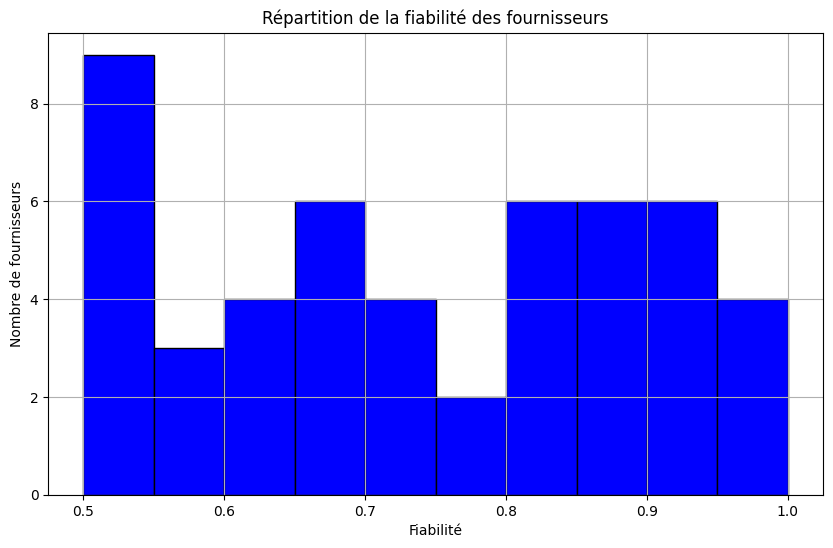

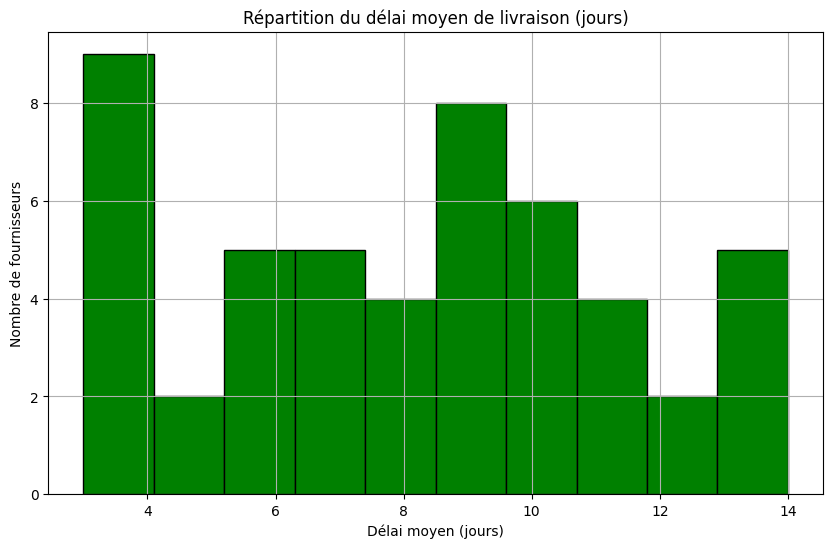

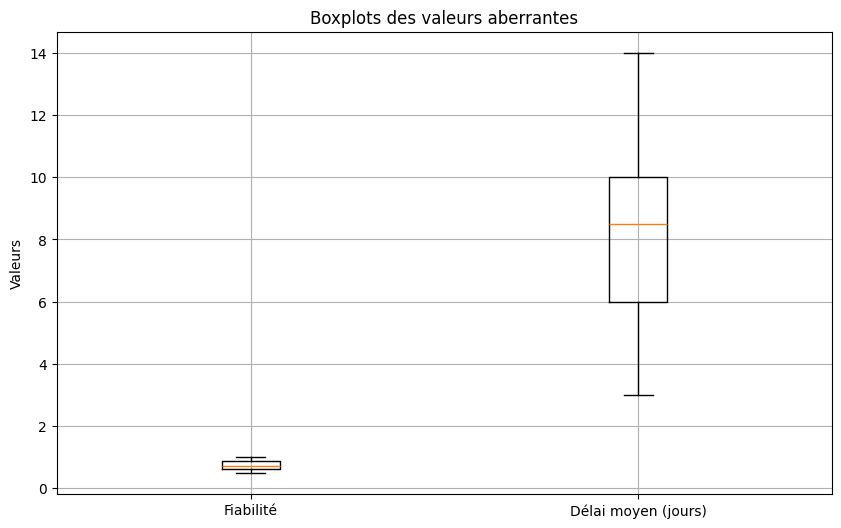


Statistiques détaillées :
       id_fournisseur  nom_fournisseur ville    pays  fiabilité  \
count              50               50    50      50  50.000000   
unique             50               50    15      15        NaN   
top              S001  Lecomte et Fils  Rome  Italie        NaN   
freq                1                1     6       6        NaN   
mean              NaN              NaN   NaN     NaN   0.738400   
std               NaN              NaN   NaN     NaN   0.153641   
min               NaN              NaN   NaN     NaN   0.500000   
25%               NaN              NaN   NaN     NaN   0.612500   
50%               NaN              NaN   NaN     NaN   0.720000   
75%               NaN              NaN   NaN     NaN   0.877500   
max               NaN              NaN   NaN     NaN   1.000000   

        délai_moyen_jours  
count           50.000000  
unique                NaN  
top                   NaN  
freq                  NaN  
mean             8.140000  


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Étape 1: Lire le fichier CSV
file_path = 'fournisseursV2.csv'
data = pd.read_csv(file_path, sep=';', header=None)

# Afficher les premières lignes pour comprendre la structure des données
print("Premières lignes des données :")
print(data.head())

# Étape 2: Nettoyer les données
# On remarque que les données sont répétées avec le nom des colonnes à chaque ligne, donc on va supprimer les lignes inutiles
cleaned_data = data[~data[0].str.contains('id_fournisseur', na=False)].copy()

# Renommer les colonnes avec les noms corrects
cleaned_data.columns = ['id_fournisseur', 'nom_fournisseur', 'ville', 'pays', 'fiabilité', 'délai_moyen_jours']

# Convertir les colonnes 'fiabilité' et 'délai_moyen_jours' en types numériques appropriés
cleaned_data['fiabilité'] = pd.to_numeric(cleaned_data['fiabilité'], errors='coerce')
cleaned_data['délai_moyen_jours'] = pd.to_numeric(cleaned_data['délai_moyen_jours'], errors='coerce')

# Afficher les premières lignes des données nettoyées
print("\nDonnées nettoyées :")
print(cleaned_data.head())

# Étape 3: Analyser les données
# Calculer des statistiques de base
print("\nStatistiques de base :")
print(cleaned_data.describe())

# Identifier les valeurs manquantes
print("\nValeurs manquantes :")
print(cleaned_data.isnull().sum())

# Étape 4: Visualiser les données
# Visualiser la répartition de la fiabilité des fournisseurs avec un histogramme
plt.figure(figsize=(10, 6))
plt.hist(cleaned_data['fiabilité'], bins=10, color='blue', edgecolor='black')
plt.title('Répartition de la fiabilité des fournisseurs')
plt.xlabel('Fiabilité')
plt.ylabel('Nombre de fournisseurs')
plt.grid(True)
plt.show()

# Visualiser la répartition du délai moyen de livraison avec un histogramme
plt.figure(figsize=(10, 6))
plt.hist(cleaned_data['délai_moyen_jours'], bins=10, color='green', edgecolor='black')
plt.title('Répartition du délai moyen de livraison (jours)')
plt.xlabel('Délai moyen (jours)')
plt.ylabel('Nombre de fournisseurs')
plt.grid(True)
plt.show()

# Visualiser les valeurs aberrantes avec des boxplots
plt.figure(figsize=(10, 6))
plt.boxplot([cleaned_data['fiabilité'], cleaned_data['délai_moyen_jours']], tick_labels=['Fiabilité', 'Délai moyen (jours)'])
plt.title('Boxplots des valeurs aberrantes')
plt.ylabel('Valeurs')
plt.grid(True)
plt.show()

# Étape 5: Statistiques détaillées
print("\nStatistiques détaillées :")
print(cleaned_data.describe(include='all'))